### Importing and understanding general overview of data

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
order_data = pd.read_csv("../data/olist_orders_dataset.csv")
order_item_data = pd.read_csv("../data/olist_order_items_dataset.csv")
customer_data = pd.read_csv("../data/olist_customers_dataset.csv")

In [169]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [170]:
order_item_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [171]:
customer_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [172]:
print(order_data.info())
print(order_item_data.info())
print(customer_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

## Used SQL via Sqlite to query and join the three datasets focusing on keeping only columns that are relevant to analysis

Importing joined dataset


In [173]:
import sqlite3 as sqlt

In [174]:
conn = sqlt.connect("../olist.db")
joined_data = pd.read_sql_query("SELECT * FROM enriched_logistics_data", conn)
conn.close()


In [175]:
joined_data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,4
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,4
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,5
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,2017-11-23 19:45:59,45.00,27.20,sao goncalo do amarante,RN,5
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2018-02-19 20:31:37,19.90,8.72,santo andre,SP,5


In [176]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114092 entries, 0 to 114091
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_id                       114092 non-null  object
 1   order_status                   114092 non-null  object
 2   order_purchase_timestamp       114092 non-null  object
 3   order_approved_at              114092 non-null  object
 4   order_delivered_carrier_date   114092 non-null  object
 5   order_delivered_customer_date  114092 non-null  object
 6   order_estimated_delivery_date  114092 non-null  object
 7   shipping_limit_date            113314 non-null  object
 8   price                          113314 non-null  object
 9   freight_value                  113314 non-null  object
 10  customer_city                  114092 non-null  object
 11  customer_state                 114092 non-null  object
 12  review_score                   113131 non-nu

In [177]:
joined_data.shape

(114092, 13)

### Data Cleaning

In [178]:
# Handling dataypes

# Setting dates to a consistent format
# Converting all columns that have the word "Date" in them to Datetime format
joined_data.rename(columns={"order_approved_at":"order_approved_date"}, inplace=True)
joined_data.rename(columns={"order_purchase_timestamp":"order_purchase_date"}, inplace=True)

count = 0
for col_name in joined_data.columns.tolist():
    if "date" in col_name:
        count += 1
        joined_data[col_name] = pd.to_datetime(joined_data[col_name], errors='coerce')
print(f"{count} Column were converted to datetime")

# freight value and price columns to float
joined_data["freight_value"] = joined_data["freight_value"].astype(float) 
joined_data["price"] = joined_data["price"].astype(float)

# review_score to int
joined_data["review_score"] = pd.to_numeric(joined_data["review_score"])

6 Column were converted to datetime


In [179]:
# Checking for missing values
joined_data.isnull().sum()

order_id                            0
order_status                        0
order_purchase_date                 0
order_approved_date               162
order_delivered_carrier_date     1980
order_delivered_customer_date    3253
order_estimated_delivery_date       0
shipping_limit_date               778
price                             778
freight_value                     778
customer_city                       0
customer_state                      0
review_score                      961
dtype: int64

In [180]:
# Handling missing data

# Filling missing frieght values with median
joined_data["freight_value"] = joined_data["freight_value"].fillna(joined_data["freight_value"].median())

# Filling missing price values with median
joined_data["price"] = joined_data["price"].fillna(joined_data["price"].median())

# Filling missing shipping limit date values using the average difference between the 
# order approval date and order shipping limit of other orders

# Getting the differences and average shipping window
differences = joined_data["shipping_limit_date"] - joined_data["order_approved_date"]
avg_shipping_window = pd.Timedelta(differences.mean())

# Fill the nulls in shipping_limit_date by adding that gap to the approval date
joined_data['shipping_limit_date'] = joined_data['shipping_limit_date'].fillna(joined_data['order_approved_date'] + avg_shipping_window)

  


In [181]:
missing_values = joined_data[joined_data["review_score"].isna()]
missing_values["order_status"].value_counts()

order_status
delivered      827
shipped         86
canceled        20
unavailable     14
processing       6
invoiced         6
created          2
Name: count, dtype: int64

In [182]:
joined_data.isnull().sum()

order_id                            0
order_status                        0
order_purchase_date                 0
order_approved_date               162
order_delivered_carrier_date     1980
order_delivered_customer_date    3253
order_estimated_delivery_date       0
shipping_limit_date               147
price                               0
freight_value                       0
customer_city                       0
customer_state                      0
review_score                      961
dtype: int64

The remaining null values in the delivery related columns, represents orders whose statuses are either cancelled, unavailable, invoiced, processing or more. Therefore, they are left as null beacause those null values are relevant o our analysis

In [183]:
# Check for Duplicate Values
joined_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
114087    False
114088    False
114089    False
114090     True
114091    False
Length: 114092, dtype: bool

In [184]:
# Dropping duplicate values
joined_data.drop_duplicates(inplace= True)
joined_data.shape

(102568, 13)

In [185]:
joined_data["order_status"].value_counts()

order_status
delivered      99564
shipped         1126
canceled         629
unavailable      611
invoiced         326
processing       305
created            5
approved           2
Name: count, dtype: int64

## Using the data to answer questions

In [186]:
joined_data.head()

,order_id,order_status,order_purchase_date,order_approved_date,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11-23 19:45:59,45.00,27.20,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-19 20:31:37,19.90,8.72,santo andre,SP,5.0


#### Question 1: What percentage of orders were delivered late and most of them were to what city? 

In [187]:
# Computing late deliveries
delivered_only = joined_data.dropna(subset=["order_delivered_customer_date"]).copy()
delay = (delivered_only["order_estimated_delivery_date"] - delivered_only["order_delivered_customer_date"]).dt.days
delivered_only["is_late"] = delay < 0

# Getting percentage of late orders
total_delivery_count = len(delivered_only)
late_delivery_count = int(delivered_only["is_late"].value_counts().get(True, 0))
percent_of_late_deliveries = (late_delivery_count / total_delivery_count) * 100
print(f"{round(percent_of_late_deliveries)}% of orders were delivered late")

# Getting the top cities that had late deliveries
late_deliveries = delivered_only[delivered_only["is_late"] == True]
late_cities = late_deliveries.groupby("customer_city")["is_late"].count().sort_values(ascending=False)
print(late_cities.head(10))


8% of orders were delivered late
customer_city
sao paulo         965
rio de janeiro    786
salvador          212
belo horizonte    173
porto alegre      163
campinas          149
brasilia          148
fortaleza         112
niteroi           104
sao goncalo        97
Name: is_late, dtype: int64


Insight: 8% of orders were delivered late, and the city with the most late deliveries is Sao Paulo

#### Question 2: What is the relationship between late deliveries and customer review score?

is_late
False    4.262294
True     2.563905
Name: review_score, dtype: float64


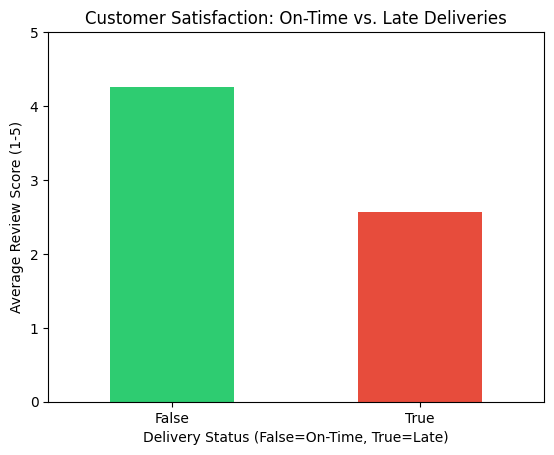

In [199]:
# Group by is_late and get the average review score
relation = delivered_only.groupby("is_late")["review_score"].mean()
print(relation)

relation.plot(kind="bar", color=['#2ecc71', '#e74c3c'])
plt.title("Customer Satisfaction: On-Time vs. Late Deliveries")
plt.xlabel("Delivery Status (False=On-Time, True=Late)")
plt.ylabel("Average Review Score (1-5)")
plt.xticks(rotation=0)
plt.ylim(0, 5)

#Saving the Chart
plt.savefig("../images/customer_satisfaction_impact.png", bbox_inches="tight")
plt.show()

Insights: Delay in delivery truly do affect customer satisfaction, with on-time deliveries having an average of 4.262294/5 (High customer satisfaction) and late deliveries having an average of 2.563905/5 (Below average customer satisfaction)

#### Question 3: How do freight costs relate to delivery duration and delays?

22.30620286576169
19.901913718383966


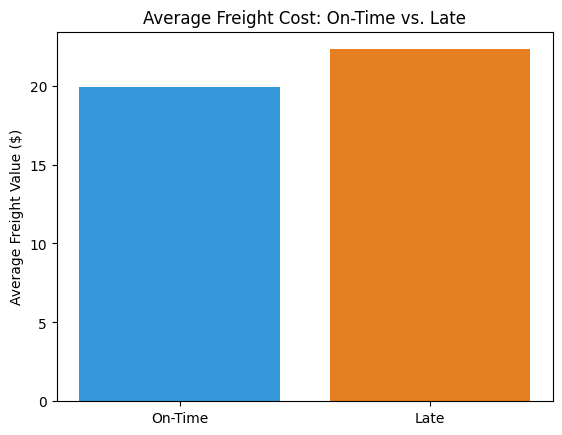

In [210]:
# # Average freight value for late deliveries
print(late_deliveries["freight_value"].mean())
# Average freight value for on-time deliveries
on_time_deliveries = delivered_only[delivered_only["is_late"] == False]
print(on_time_deliveries["freight_value"].mean())

# Data for the chart
labels = ['On-Time', 'Late']
costs = [on_time_deliveries["freight_value"].mean(), late_deliveries["freight_value"].mean()]

plt.bar(labels, costs, color=['#3498db', '#e67e22'])
plt.title("Average Freight Cost: On-Time vs. Late")
plt.ylabel("Average Freight Value ($)"),

#Saving the Chart
plt.savefig("../images/average_freight_value_late_deliveries_VS_on_time_deliveries.png", bbox_inches="tight")
plt.show()

Insights: With the average freight cost for late deliveries being just slightly higher than that of On-time, I cannot definitively say that there is a direct correlation. 

In [207]:
# 1. Calculate the actual travel time in days
delivered_only['actual_duration'] = (delivered_only['order_delivered_customer_date'] - delivered_only['order_purchase_date']).dt.days

# 2. Check the correlation
# A score near 1 means they move together; near 0 means no relation
correlation = delivered_only[['freight_value', 'actual_duration']].corr().iloc[0,1]

print(f"Correlation between Freight Cost and Delivery Days: {round(correlation, 2)}")

Correlation between Freight Cost and Delivery Days: 0.21
